# Part 1

In [1]:
import numpy as np
from matplotlib import pyplot as plt

t = 15*np.pi/180
R = np.array([[np.cos(t), np.sin(t)], [-np.sin(t), np.cos(t)]])

def loss1(x, y):
  pR = R @ [x, y]
  Z = pR[0]**2 + 9*(pR[1])**2
  return Z

def loss1_grad(x, y):
  pR = R @ [x, y]
  dpR_dxy = R
  dZ_dxy = 2.0*pR[0]*dpR_dxy[0,:] + 18.0*pR[1]*dpR_dxy[1,:]
  return dZ_dxy

def loss2(x, y):
  pR = R @ [x, y]
  Z = 0.05*(-4*(pR[0]**2) + (pR[0]**3) + (pR[0]**4) + 150*(pR[1])**2)
  return Z

def loss2_grad(x, y):
  pR = R @ [x, y]
  dpR_dxy = R
  dZ_dxy = 0.05*((-8*pR[0] + 3*(pR[0]**2) + 4*(pR[0]**3))*dpR_dxy[0,:] + 300.0*pR[1]*dpR_dxy[1,:])
  return dZ_dxy

def L_on_grid(L_func, xmin, xmax, ymin, ymax):
  grid_x, grid_y = np.meshgrid(np.linspace(xmin,xmax,100), np.linspace(ymin,ymax,100))
  grid_L = L_func(grid_x.ravel(), grid_y.ravel()).reshape(grid_x.shape)
  return grid_x, grid_y, grid_L

def plot_loss_and_steps(L_func, positions=[]):
  fig, ax = plt.subplots(figsize=(10,10))
  x, y, Lgrid = L_on_grid(L_func, -3, 3, -3, 3)
  min_val = np.min(Lgrid)
  ax.contour(x, y, Lgrid, levels=np.linspace(min_val+0.02, min_val+15, 45))
  if len(positions) > 0:
    ax.plot(positions[:,0], positions[:,1], '-', color='blue')
    ax.scatter(positions[:,0], positions[:,1], color='red', s=5)
  fig.show()

def do_grad_desc(p0, L_grad_func, eta, n_steps):
  """do simple gradient descent
  Parameters
  ----------
  p0: initial value, 2 element list or numpy vector of float or int
  L_grad_func: python function that computes gradient of loss
  eta: learning rate
  n_steps: number of steps to take

  Returns
  -------
  positions: numpy array with positions, shape=(n_steps, 2)
  """
  values = [p0]
  p = np.array(p0, dtype=np.float64)
  for i in range(n_steps):
    p -= eta * L_grad_func(p[0], p[1])
    values.append(list(p))

  return np.asarray(values)

figsize=(12,7)

def plot_2d_data_and_prediction(model, features, target):
  """scatterplot data and plot prediction on regular grid
  Parameters
  ----------
  model: sklearn model object
  features: n_samples x 2 features array
  target: n_samples long integer array, all values 0 or 1
  """

  fig, ax = plt.subplots(figsize=figsize)

  # find where target is 0 or 1
  target_is_0 = np.where(target == 0)
  target_is_1 = np.where(target == 1)

  # scatterplot the two subsets
  ax.scatter(features[target_is_0, 0], features[target_is_0, 1], label='0', color='blue')
  ax.scatter(features[target_is_1, 0], features[target_is_1, 1], label='1', color='red')

  # make a grid to predict on
  xrange = ax.get_xlim()
  yrange = ax.get_ylim()
  xgrid, ygrid = np.meshgrid(np.linspace(xrange[0], xrange[1], 100), np.linspace(yrange[0], yrange[1], 100))
  # transform grid positions into n_grid_pts x 2 array for prediction
  pos = np.stack([xgrid.ravel(), ygrid.ravel()]).T
  # do predictions
  pred_classes = model.predict(pos).reshape(xgrid.shape)
  # plot (more convenient syntax than imshow)
  ax.pcolor(xgrid, ygrid, pred_classes, zorder=0, cmap='coolwarm', edgecolors=None, alpha=0.25)

  ax.set_xlabel('x')
  ax.set_ylabel('y')
  ax.legend()
  fig.show()

## 1.1 Plot loss 1

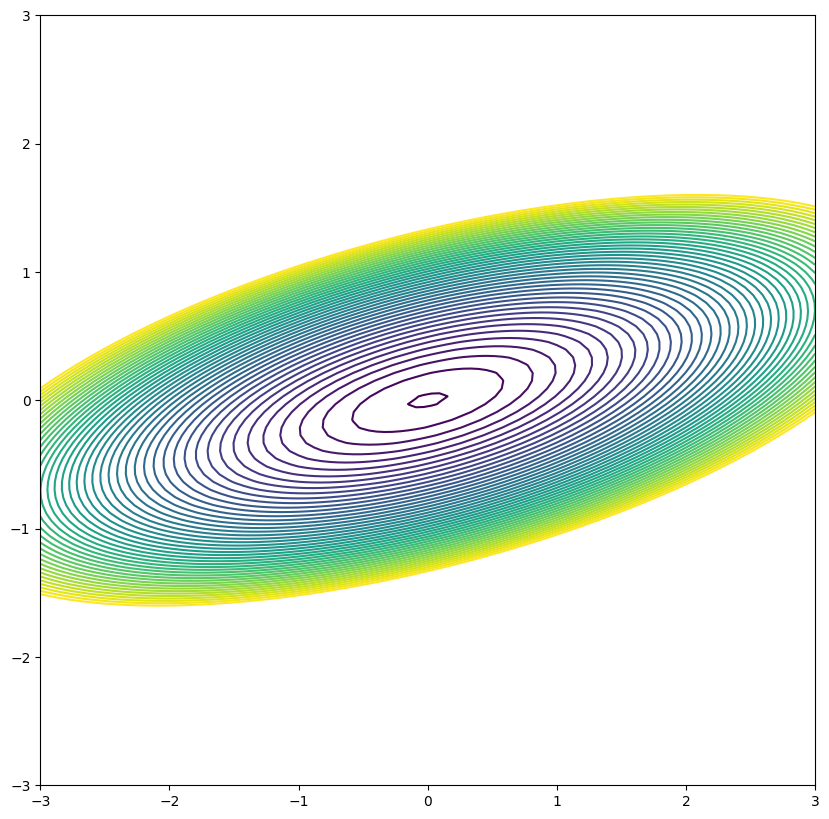

In [2]:
plot_loss_and_steps(loss1)

Approximate coordinates of loss1 function: [ 0,0 ]

## 1.2 gradient descent

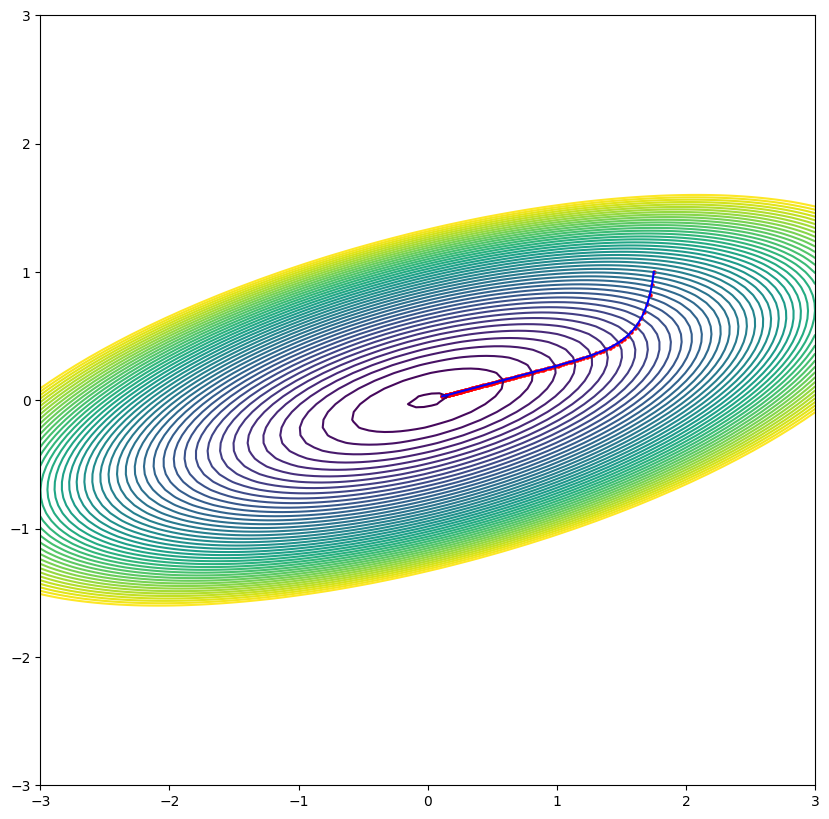

In [3]:
initial_position = [1.75,1.0]
eta = 0.01
n_steps = 140

positions = do_grad_desc([1.75,1.0], loss1_grad, eta, n_steps)
plot_loss_and_steps(loss1, positions)

eta=0.01
n_steps =140

## 1.3 increase eta

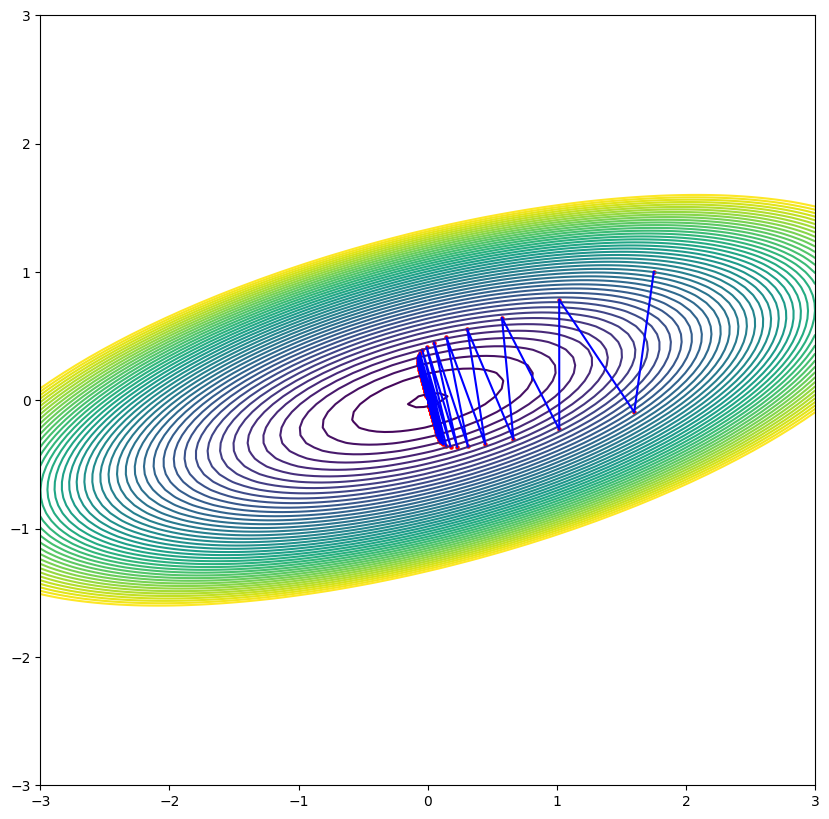

In [4]:
initial_position = [1.75,1.0]
eta = 0.11
n_steps = 140

positions = do_grad_desc([1.75,1.0], loss1_grad, eta, n_steps)
plot_loss_and_steps(loss1, positions)

eta=0.11
n_steps=140

## 1.4

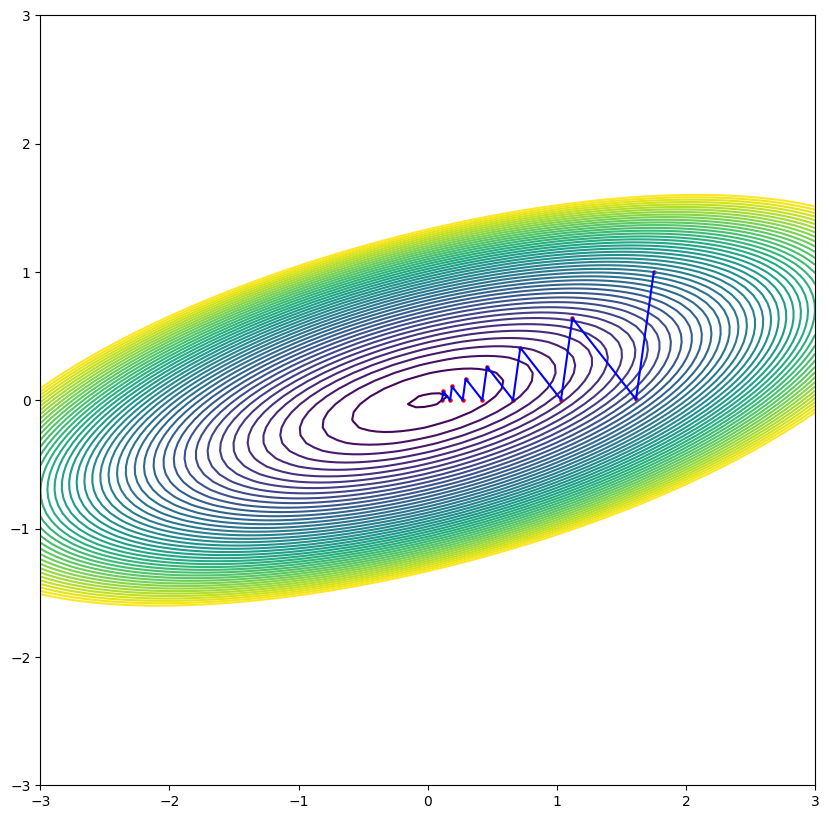

In [5]:
initial_position = [1.75,1.0]
eta = 0.10
n_steps = 13

positions = do_grad_desc([1.75,1.0], loss1_grad, eta, n_steps)
plot_loss_and_steps(loss1, positions)

eta=0.10
n_steps = 13

## 1.5 reduce eta by a factor of 2

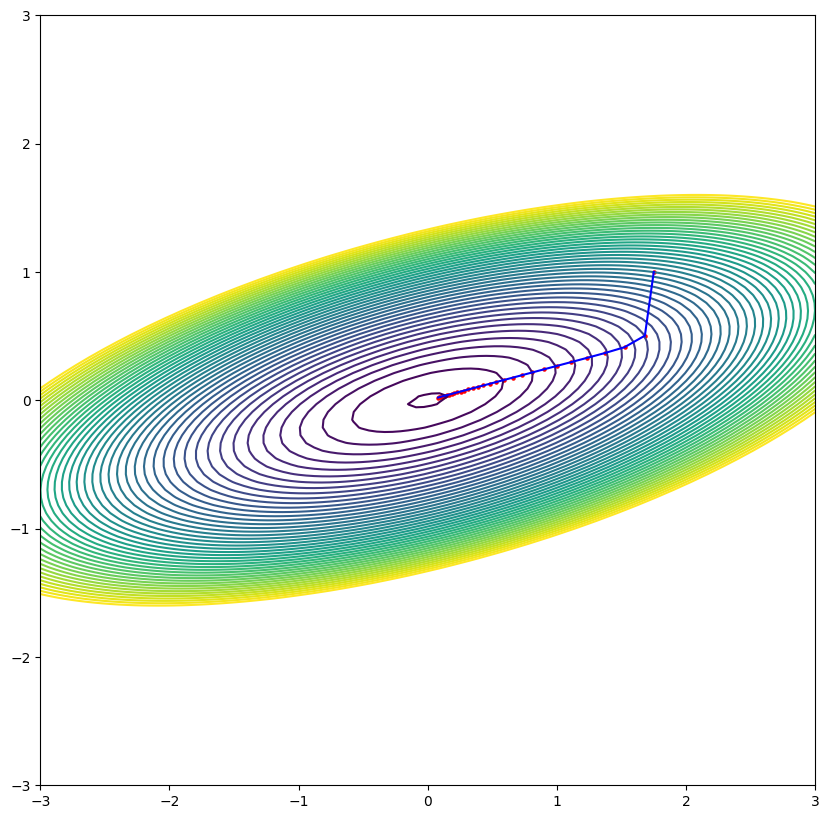

In [6]:
initial_position = [1.75,1.0]
eta = 0.05
n_steps = 30

positions = do_grad_desc([1.75,1.0], loss1_grad, eta, n_steps)
plot_loss_and_steps(loss1, positions)

eta = 0.05
n_steps=30


| Trial | Eta   | Number of Steps | Convergence     |
|-------|-------|-----------------|-----------------|
| 1     | 0.01  | 140             | Reached         |
| 2     | 0.11  | 140             | Stops converging|
| 3     | 0.10  | 13              | Reached         |
| 4     | 0.05  | 30              | Reached         |


For trial 1, with eta = 0.01 and n_steps = 140, the algorithm coverged to the minimum slowly(more steps needed). Smaller eta lead to slower convergence which means more steps needed.  
For trail 2, with eta=0.11, it stop converging, it can't reach the minimum with 140 steps.
For trail 3, with 0.10 eta and 13 steps, the path barely reach the inner contour.
For trail 4 with lower eta(0.05), and I increase number of steps a litte(30), it become converged, the minimum contour reached.

Small eta lead to slowe convergence, it need more steps. For large eta, fewer steps needed to convergence. So it's more stable with smaller eta and we can adjust the steps gradually. It's safer to start with a smaller eta compare to large eta. In conclusion, eta(learning rate) and number of steps reversly proportional to each other.
Small eta --> more steps
larger eta --> fewer steps


## 1.7 loss2

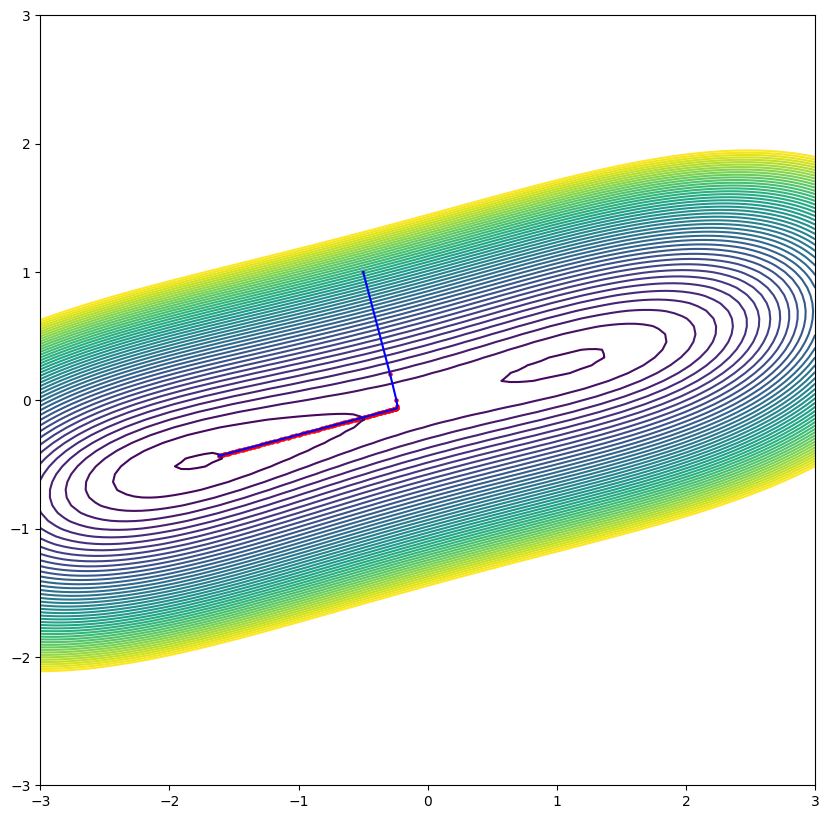

In [7]:
initial_position = [-0.5,1.0]
eta = 0.05
n_steps = 120

positions = do_grad_desc(initial_position, loss2_grad, eta, n_steps)
plot_loss_and_steps(loss2, positions)

approximate coordinates: [ -1.5, -0.5 ]
Number of steps: 120

## 1.8

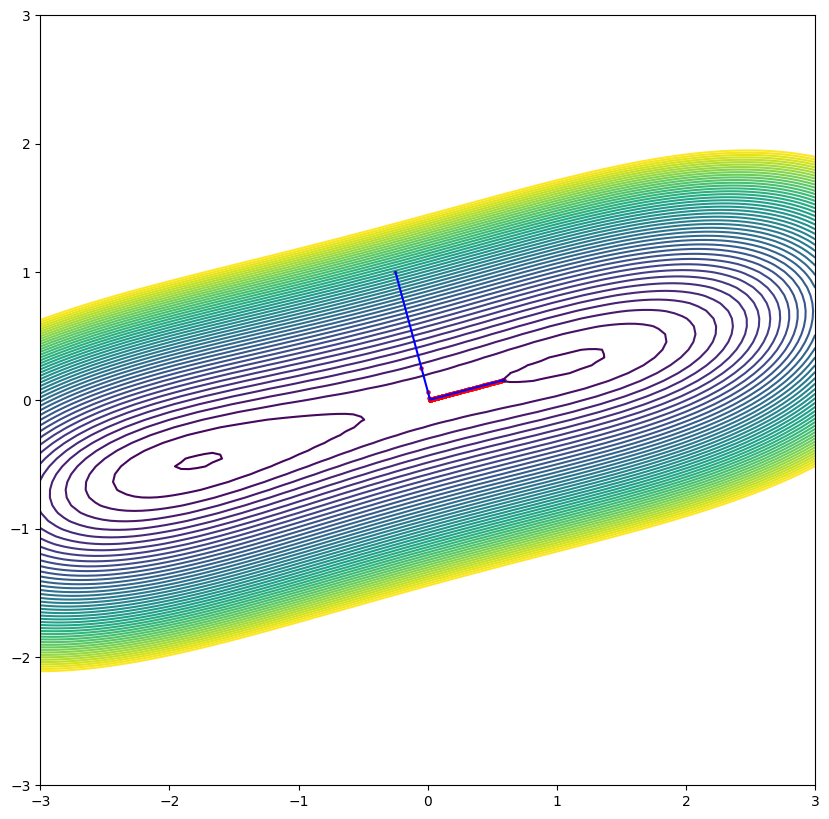

In [8]:
initial_position = [-0.25, 1.0]
eta = 0.05
n_steps = 200

positions = do_grad_desc(initial_position, loss2_grad, eta, n_steps)
plot_loss_and_steps(loss2, positions)


approximate coordinate: [ 1.0, 0.2 ] number of steps:200

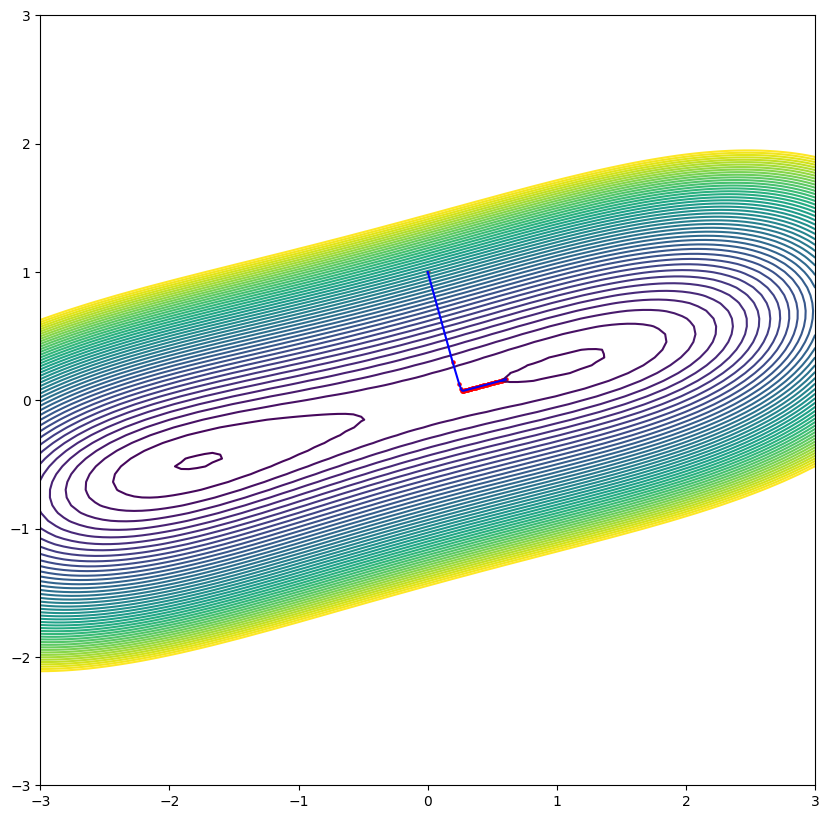

In [9]:
initial_position = [0.0, 1.0]
eta = 0.05
n_steps = 60

positions = do_grad_desc(initial_position, loss2_grad, eta, n_steps)
plot_loss_and_steps(loss2, positions)


approximate coordinate:[ 1.0, 0.2 ] number of steps: 60

With differnet initial position, the covergence will be differnet and the approximate coordinate for minimum will vary too. When inital position is at [ 0.0, 1.0 ], it's more close to the global minimum so it need less step to convergnece. When intial position is at [ -0.25, 1.0], it need more step to converge. It turns out that initiation point is important for determining how easy it would be to find the golobal minimum.The easy way to find the global minimum is to start from position near the minimum.



# Part 2

## 2.1 read data

In [10]:
import sklearn.datasets

# Load the Iris dataset
d = sklearn.datasets.load_iris()

print(d.keys())
print(d['DESCR'])
print(d['feature_names'])

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= =====

## 2.2 split data

In [11]:
from sklearn.model_selection import train_test_split

# Set the random seed
random_seed = 5

#split data
x_train, x_test, y_train, y_test = train_test_split(d['data'], d['target'], test_size=1/3, random_state=random_seed)

print("Training data shape:", x_train.shape)
print("Testing data shape:", x_test.shape)
print("Training labels shape:", y_train.shape)
print("Testing labels shape:", y_test.shape)

Training data shape: (100, 4)
Testing data shape: (50, 4)
Training labels shape: (100,)
Testing labels shape: (50,)


## 2.3 create two features arrays

In [12]:
import numpy as np

# sepal length (column 0) and petal length (column 2)
x_train_2d = np.array(x_train[:, [0, 2]])
x_test_2d = np.array(x_test[:, [0, 2]])

print("2D Training data shape:", x_train_2d.shape)
print("2D Testing data shape:", x_test_2d.shape)

2D Training data shape: (100, 2)
2D Testing data shape: (50, 2)


## 2.4 make target arrays

In [13]:
y_train_binary = (y_train == 1).astype(int)
y_test_binary = (y_test == 1).astype(int)

print("Binary training labels:")
print(y_train_binary)
print("Binary testing labels:")
print(y_test_binary)

Binary training labels:
[0 0 0 0 0 1 1 1 1 0 1 0 0 1 0 1 0 1 0 1 0 1 0 1 1 1 0 1 0 0 0 0 1 0 0 0 1
 0 0 0 0 1 0 0 0 1 1 0 0 0 1 1 0 1 0 1 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 1 0 0 1]
Binary testing labels:
[1 0 0 0 0 1 0 1 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 1 1 1 0 0 1 1 0 1 0 0
 0 0 0 0 1 0 0 1 0 1 0 0 0]


## 2.5 Logestic Regression model

In [14]:
from sklearn.linear_model import LogisticRegression

model_lin = LogisticRegression(max_iter=1000)
model_lin.fit(x_train_2d, y_train_binary)

LogisticRegression(max_iter=1000)

## 2.6 check the source code or the popup function signature

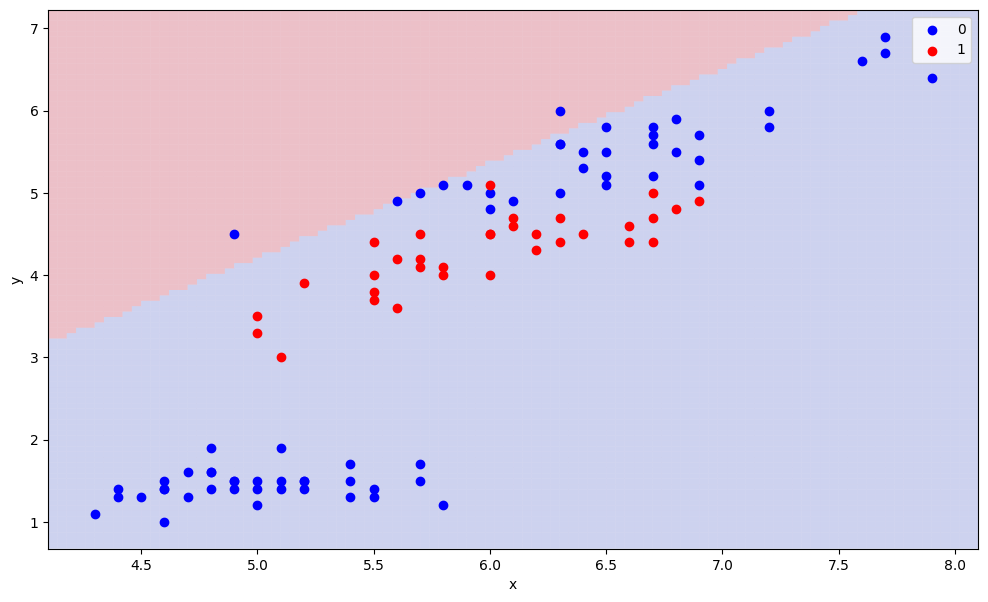

In [15]:
plot_2d_data_and_prediction(model_lin, x_train_2d, y_train_binary)

I don't it's a good classification because red points are placed within blur region.

## 2.7 create pipeline

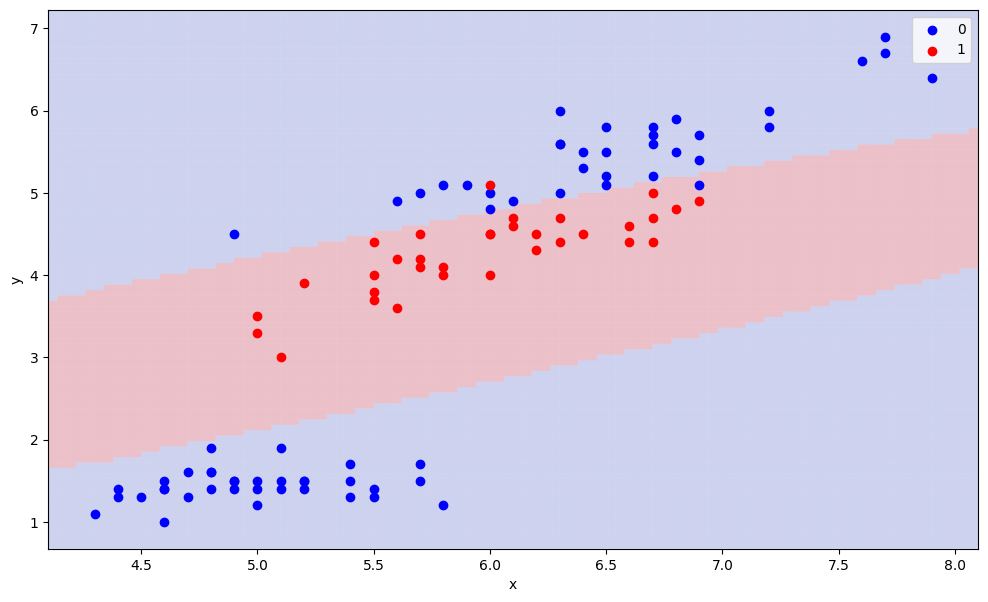

In [16]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

poly_model = make_pipeline(PolynomialFeatures(degree=2), LogisticRegression(max_iter=200))
poly_model.fit(x_train_2d, y_train_binary)

plot_2d_data_and_prediction(poly_model, x_train_2d, y_train_binary)

The classification is good, it successfully classified datas, and it seperate them efficiently where most of blue dots are in blue region and most red dots in red region. But there still some red dots misclassified into blue region, and some of blue does are misclassified into red region too.

## 2.8 score method

In [17]:
logestic_score = model_lin.score(x_test_2d, y_test_binary)
poly_score = poly_model.score(x_test_2d, y_test_binary)

print("Logistic model score:", logestic_score)
print("Polynomial model score:", poly_score)

Logistic model score: 0.64
Polynomial model score: 0.92


Based on the score, polynomial model have a better fit than logistic model which consist with plot results. The logestic model in cell 6, it have a lower fit score. Also by looking at the plot for logestic model, it fail to classify two datas. In logestic plot, majority of red dots are misclassified into blue region and few blue dots misclassified to red region too. The boundary is not flexible, so it can't get the correct data structure. The polynomial model have a relatively higher fit score, it can be considered as a good fit. By looking at the plot in cell 7, majority of data are classified to the right region. Only few datas are misclassified.

## 2.9

In [18]:
x_full = d.data
y_full = (d.target == 1).astype(int)

x_train_full, x_test_full, y_train_full, y_test_full = train_test_split(x_full, y_full, test_size=1/3, random_state=5)

model_full = LogisticRegression(max_iter=200)
model_full.fit(x_train_full, y_train_full)

score_full = model_full.score(x_test_full, y_test_full)
print("Score for the full four-feature model:", score_full)

Score for the full four-feature model: 0.68


The score of full four features model is 0.68. Compare to linear(logestic) model, they have similar score. In this case, introducing more data didn't imporove the fit. Compare to quadratic 2-feature model, the fit of full four features model is not perfect. Full four features have more features to deal with. According to the score, there might be some overlaping and misclassification occur. But there are more features in full four features, which means there are more datas, which will make the classification harder.